In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matlplotlib inline


UsageError: Line magic function `%matlplotlib` not found.


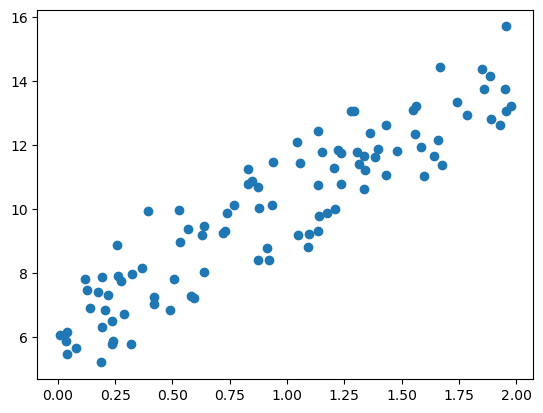

In [194]:
np.random.seed(0)
X = 2*np.random.rand(100,1)
y = 6+4 * X+np.random.randn(100,1)

plt.scatter(X,y)

# 비용함수
비용함수는 원래의 값과 가장 오차가 작은 가설함수 를 도출하기 위해 사용되는 함수입니다.
가설함수의 형태를 결정짓는 것은 매개변수(parameter) 라 부르는 θ 입니다. 우리는 이 θ값을 적절하게 조정하여 실제값 y에 가장 근접한 가설함수* 를 Training set을 이용하여 도출해야 합니다.
이것이 Cost Function입니다.

h(x)-θ 은 '가설함수와 실제 y값의 차이'입니다. 이것을 최소화 하는 것이 목표이지만 그냥 사용하면 오차가 양수 혹은 음수가 될 수 있으므로 제곱을 해줍니다. 그리고 Training set은 1부터 m까지 존재하기에 각각의 차이를 모두 더하여 평균을 내어 이 평균이 최소가 되게 만드는 θ를 구하는 것이 Cost Function의 목적이 되겠습니다. 

##### 편미분 값이 너무 클 수 있기 때문에 보정계수를 곱하는데 이를 "학습률" 이라고 합니다 (learning_rate)

In [195]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape 와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # dot 내적연산 
    y_pred = np.dot(X, w1.T)+ w0
    diff = y-y_pred
    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    # learning_rate : 학습 스텝의 크기 
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

    return w1_update, w0_update


In [196]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))


In [197]:
y_pred = np.dot(X, w1.T)+ w0
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [198]:
y

array([[ 9.22535819],
       [12.62234142],
       [11.28776945],
       [ 8.82282178],
       [10.87749059],
       [13.06304208],
       [10.67947726],
       [12.95425917],
       [12.63854946],
       [10.12198388],
       [11.93062336],
       [11.45360443],
       [10.75263147],
       [14.38141214],
       [ 6.92465486],
       [ 7.40360757],
       [ 6.1722472 ],
       [14.44682926],
       [12.3521661 ],
       [13.36208655],
       [15.71209743],
       [11.04550945],
       [ 8.4213499 ],
       [13.21363012],
       [ 5.773072  ],
       [13.06298936],
       [ 6.73320732],
       [12.80989652],
       [12.0977286 ],
       [10.79781031],
       [ 9.98400386],
       [13.09991417],
       [ 8.78797697],
       [12.45753654],
       [ 5.88231503],
       [11.74354037],
       [11.84401775],
       [10.78046188],
       [14.164064  ],
       [12.37676906],
       [ 9.25248874],
       [ 8.39685484],
       [11.87928774],
       [ 7.80818967],
       [10.63956586],
       [11

In [199]:
diff = y-y_pred
diff

array([[ 9.22535819],
       [12.62234142],
       [11.28776945],
       [ 8.82282178],
       [10.87749059],
       [13.06304208],
       [10.67947726],
       [12.95425917],
       [12.63854946],
       [10.12198388],
       [11.93062336],
       [11.45360443],
       [10.75263147],
       [14.38141214],
       [ 6.92465486],
       [ 7.40360757],
       [ 6.1722472 ],
       [14.44682926],
       [12.3521661 ],
       [13.36208655],
       [15.71209743],
       [11.04550945],
       [ 8.4213499 ],
       [13.21363012],
       [ 5.773072  ],
       [13.06298936],
       [ 6.73320732],
       [12.80989652],
       [12.0977286 ],
       [10.79781031],
       [ 9.98400386],
       [13.09991417],
       [ 8.78797697],
       [12.45753654],
       [ 5.88231503],
       [11.74354037],
       [11.84401775],
       [10.78046188],
       [14.164064  ],
       [12.37676906],
       [ 9.25248874],
       [ 8.39685484],
       [11.87928774],
       [ 7.80818967],
       [10.63956586],
       [11

In [200]:
X

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304],
       [1.58345008],
       [1.05778984],
       [1.13608912],
       [1.85119328],
       [0.14207212],
       [0.1742586 ],
       [0.04043679],
       [1.66523969],
       [1.5563135 ],
       [1.7400243 ],
       [1.95723668],
       [1.59831713],
       [0.92295872],
       [1.56105835],
       [0.23654885],
       [1.27984204],
       [0.28670657],
       [1.88933783],
       [1.04369664],
       [0.82932388],
       [0.52911122],
       [1.54846738],
       [0.91230066],
       [1.1368679 ],
       [0.0375796 ],
       [1.23527099],
       [1.22419145],
       [1.23386799],
       [1.88749616],
       [1.3636406 ],
       [0.7190158 ],
       [0.87406391],
       [1.39526239],
       [0.12045094],
       [1.33353343],
       [1.34127574],
       [0.42076512],
       [0.257

In [201]:
X.T

array([[1.09762701, 1.43037873, 1.20552675, 1.08976637, 0.8473096 ,
        1.29178823, 0.87517442, 1.783546  , 1.92732552, 0.76688304,
        1.58345008, 1.05778984, 1.13608912, 1.85119328, 0.14207212,
        0.1742586 , 0.04043679, 1.66523969, 1.5563135 , 1.7400243 ,
        1.95723668, 1.59831713, 0.92295872, 1.56105835, 0.23654885,
        1.27984204, 0.28670657, 1.88933783, 1.04369664, 0.82932388,
        0.52911122, 1.54846738, 0.91230066, 1.1368679 , 0.0375796 ,
        1.23527099, 1.22419145, 1.23386799, 1.88749616, 1.3636406 ,
        0.7190158 , 0.87406391, 1.39526239, 0.12045094, 1.33353343,
        1.34127574, 0.42076512, 0.2578526 , 0.6308567 , 0.72742154,
        1.14039354, 0.87720303, 1.97674768, 0.20408962, 0.41775351,
        0.32261904, 1.30621665, 0.50658321, 0.93262155, 0.48885118,
        0.31793917, 0.22075028, 1.31265918, 0.2763659 , 0.39316472,
        0.73745034, 1.64198646, 0.19420255, 1.67588981, 0.19219682,
        1.95291893, 0.9373024 , 1.95352218, 1.20

In [202]:
np.dot(X.T, diff)

array([[1075.13406958]])

In [203]:
N = len(y)
learning_rate =0.01
w1_update= -(2/N)*learning_rate*np.dot(X.T, diff)
w1_update

array([[-0.21502681]])

In [204]:
w1 = w1 - w1_update


In [205]:
w1 

array([[0.21502681]])

In [206]:
w0_factors = np.ones((100,1))
w0_factors 

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [207]:
w0_factors.T

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

In [208]:
w0_update= -(2/N)*learning_rate*np.dot(w0_factors.T, diff)
w0_update

array([[-0.1994937]])

In [209]:
w0 = w0 -w0_update

In [210]:
w0

array([[0.1994937]])

In [211]:
w1_update = np.zeros_like(w1)
w0_update = np.zeros_like(w0)

N = len(y)

y_pred = np.dot(X, w1.T)+ w0
diff = y-y_pred

In [212]:
def qradient_descent_steps(X, y, iters=1000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates ()호출하여 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [213]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y- y_pred))/N
    return cost
w1, w0 = qradient_descent_steps(X, y, iters= 1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X +w0
print("Gradient Descent Total Coat:{0:.4f}".format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Coat:0.9935


In [214]:
y_pred =  np.zeros((1,1))
y_pred

array([[0.]])

[67.30998637]


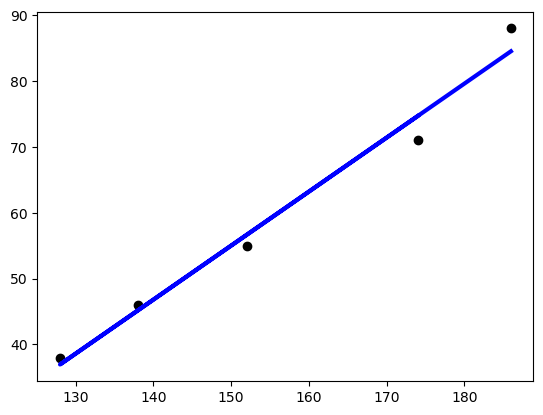

In [215]:
import matplotlib.pylab as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174],[152],[138],[128],[186]]
y = [71,55,46,38,88]
reg.fit(X,y)

print(reg.predict([[165]]))

plt.scatter(X,y, color='black')

y_pred = reg.predict(X)
plt.plot(X, y_pred, color='blue',linewidth=3)
plt.show()

In [216]:
y_pred

array([74.69188821, 56.64723926, 45.16428085, 36.96216769, 84.53442399])